Date: 11 November 2022

Team ID: PNT2022TMID36912

Project Name: ANALYTICS FOR HOSPITALS’ HEALTH-CARE DATA 

Team Members: ENITHA M, BHAGYALAKSHMI T, DIVYADHARSHINI S, LOGESHWARI S

# TRAINING

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [32]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [33]:
inputs = tf.keras.Input(shape=(38,))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(11, activation='softmax')(x)

nn_model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [34]:
nn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
batch_size = 32
epochs = 10

history = nn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
)

Epoch 1/10
6369/6369 [==============================] - 10s 2ms/step - loss: 1.6315 - accuracy: 0.3798 - val_loss: 1.5786 - val_accuracy: 0.3954
Epoch 2/10
6369/6369 [==============================] - 10s 2ms/step - loss: 1.5681 - accuracy: 0.4016 - val_loss: 1.5675 - val_accuracy: 0.4004
Epoch 3/10
6369/6369 [==============================] - 10s 2ms/step - loss: 1.5560 - accuracy: 0.4055 - val_loss: 1.5547 - val_accuracy: 0.4045
Epoch 4/10
6369/6369 [==============================] - 10s 2ms/step - loss: 1.5497 - accuracy: 0.4054 - val_loss: 1.5547 - val_accuracy: 0.4053
Epoch 5/10
6369/6369 [==============================] - 10s 2ms/step - loss: 1.5456 - accuracy: 0.4068 - val_loss: 1.5495 - val_accuracy: 0.4047
Epoch 6/10
6369/6369 [==============================] - 10s 2ms/step - loss: 1.5422 - accuracy: 0.4084 - val_loss: 1.5485 - val_accuracy: 0.4066
Epoch 7/10
6369/6369 [==============================] - 10s 2ms/step - loss: 1.5398 - accuracy: 0.4091 - val_loss: 1.5457 - val_ac

In [36]:
print(f"Logistic Regression Acc: {log_model.score(X_test, y_test)}")
print(f"     Neural Netowrk Acc: {nn_model.evaluate(X_test, y_test, verbose=0)[1]}")

Logistic Regression Acc: 0.3912353975631202
     Neural Netowrk Acc: 0.4126836955547333


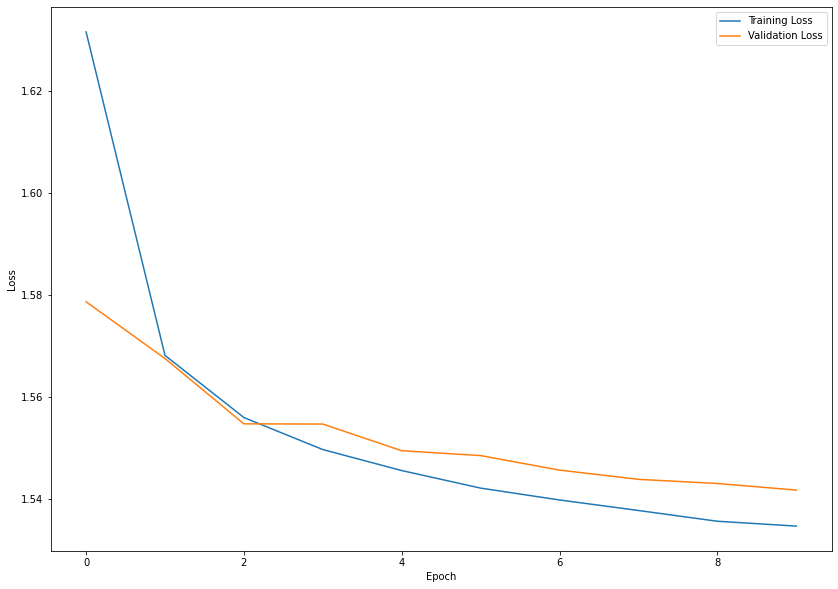

In [37]:
plt.figure(figsize=(14, 10))

plt.plot(range(epochs), history.history['loss'], label="Training Loss")
plt.plot(range(epochs), history.history['val_loss'], label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')

plt.show()

In [38]:
np.argmin(history.history['val_loss']) + 1

10